In [47]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [48]:
name_file = './customer_segmentation.csv'
data_set = pd.read_csv(name_file)
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [49]:
data_set['Dt_Customer'] = pd.to_datetime(data_set['Dt_Customer'], format="%d-%m-%Y")
dates = []
for i in data_set['Dt_Customer']:
  i = i.date()
  dates.append(i)

#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in therecords: 2014-06-29
The oldest customer's enrolment date in the records: 2012-07-30


In [50]:
data_set = pd.read_csv("./customer_segmentation.csv")
Year_Birth = data_set["Year_Birth"]
now = np.int64(2014)
year_old = []
for item in Year_Birth:
    item = now - item
    year_old.append(item)
data_set["Year_Birth"] = year_old
data_set.to_csv("./customer.csv")   


In [51]:

def Exotic_int(file_path, label_name, value):
    value_where =  np.int64(value)
    data_set = pd.read_csv(file_path)
    data_set = data_set[data_set[label_name] <= value_where]
    data_set.to_csv(file_path, index=False)
    
def Exotic_float(file_path, label_name, value):
    value_where =  np.float32(value)
    data_set = pd.read_csv(file_path)
    data_set = data_set[data_set[label_name] <= value_where]
    data_set.to_csv(file_path, index=False)
Exotic_int('customer.csv', 'Year_Birth', 90)
Exotic_float('customer.csv', 'Income', 110000.0)


In [52]:
data_set = pd.read_csv('./customer.csv')
data_set.describe()

,Unnamed: 0,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,...,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.0,2204.0,2204.000000
mean,1122.481397,5585.877949,45.084846,51593.913339,0.442377,0.506806,49.027223,306.300817,26.414247,165.385662,...,5.338929,0.073956,0.074410,0.073049,0.064428,0.013612,0.009074,3.0,11.0,0.151089
std,642.442256,3248.218122,11.697370,20675.438792,0.537171,0.544397,28.926114,337.509819,39.790114,217.806467,...,2.412313,0.261759,0.262497,0.260276,0.245570,0.115898,0.094848,0.0,0.0,0.358217
min,0.000000,0.000000,18.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,567.750000,2814.750000,37.000000,35191.500000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,1121.500000,5458.500000,44.000000,51277.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,1678.250000,8418.500000,55.000000,68275.750000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,2239.000000,11191.000000,74.000000,105471.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


C:\Users\DELL\AppData\Local\Temp\ipykernel_11436\207421197.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data = data_set['MntMeatProducts'], label = "Meat", ci=None)
C:\Users\DELL\AppData\Local\Temp\ipykernel_11436\207421197.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data = data_set['MntSweetProducts'], label = "Sweet", ci=None)
C:\Users\DELL\AppData\Local\Temp\ipykernel_11436\207421197.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data = data_set['MntGoldProds'], label = "analgesic ", ci=None)
C:\Users\DELL\AppData\Local\Temp\ipykernel_11436\207421197.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data = data_set['MntWines'], label = "Wines", color = "black" ,ci=None)
C:\Users\DELL\AppData\Local\Temp\ipykernel_11436

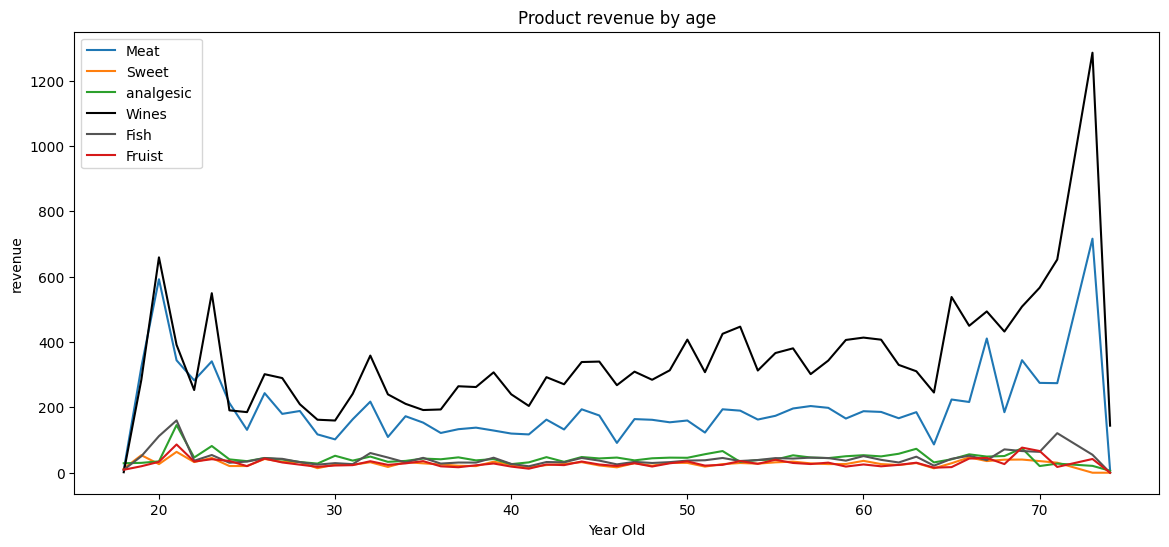

In [53]:
data_set = pd.read_csv('./customer.csv', index_col="Year_Birth")
plt.figure(figsize=(14,6))
plt.title("Product revenue by age")
sns.lineplot(data = data_set['MntMeatProducts'], label = "Meat", ci=None)
sns.lineplot(data = data_set['MntSweetProducts'], label = "Sweet", ci=None)
sns.lineplot(data = data_set['MntGoldProds'], label = "analgesic ", ci=None)
sns.lineplot(data = data_set['MntWines'], label = "Wines", color = "black" ,ci=None)
sns.lineplot(data = data_set['MntFishProducts'], label = "Fish", color = "#545454", ci=None)
sns.lineplot(data = data_set['MntFruits'], label = "Fruist",color = "#D61919", ci=None)
plt.xlabel('Year Old')
plt.ylabel("revenue")
plt.show()



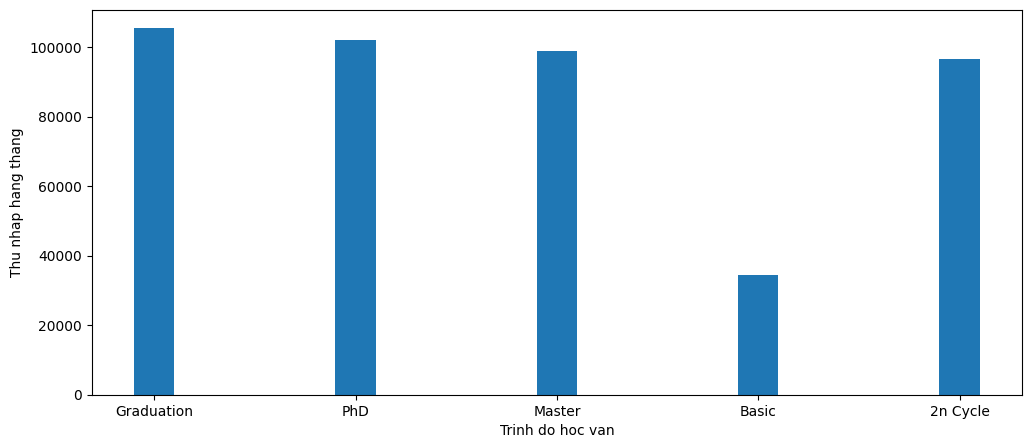

In [54]:
plt.figure(figsize=(12,5))
plt.bar(data_set['Education'], data_set['Income'], width=0.2 )
plt.xlabel("Trinh do hoc van")
plt.ylabel("Thu nhap hang thang")
plt.show()

In [55]:
data_set = pd.read_csv("./customer.csv")

accepted1 = data_set["AcceptedCmp1"]
accepted2 = data_set["AcceptedCmp2"]
accepted3 = data_set["AcceptedCmp3"]
accepted4 = data_set["AcceptedCmp4"]
accepted5 = data_set["AcceptedCmp5"]
total1 = sum(accepted1) 
total2 = sum(accepted2) 
total3 = sum(accepted3)
total4 = sum(accepted4) 
total5 = sum(accepted5)
xlabelx = []
xlabelx.append(total1)
xlabelx.append(total2)
xlabelx.append(total3)
xlabelx.append(total4)
xlabelx.append(total5)

print(xlabelx)


[142, 30, 163, 164, 161]


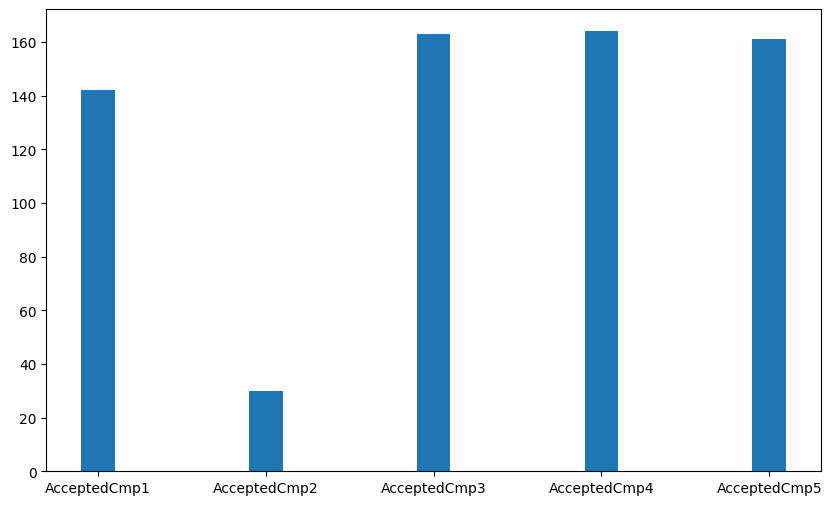

In [56]:
plt.figure(figsize=(10,6))
accepted =["AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5"]
plt.bar(accepted, xlabelx, width=0.2)


plt.show()

In [57]:
commodities = data_set.loc[:, ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
Sum_collums =  []
index = 0
for item in commodities:
    data = data_set[item]
    index = sum(data)
    Sum_collums.append(index)
print(Sum_collums)


[675087, 58217, 364510, 83252, 59556, 97143]


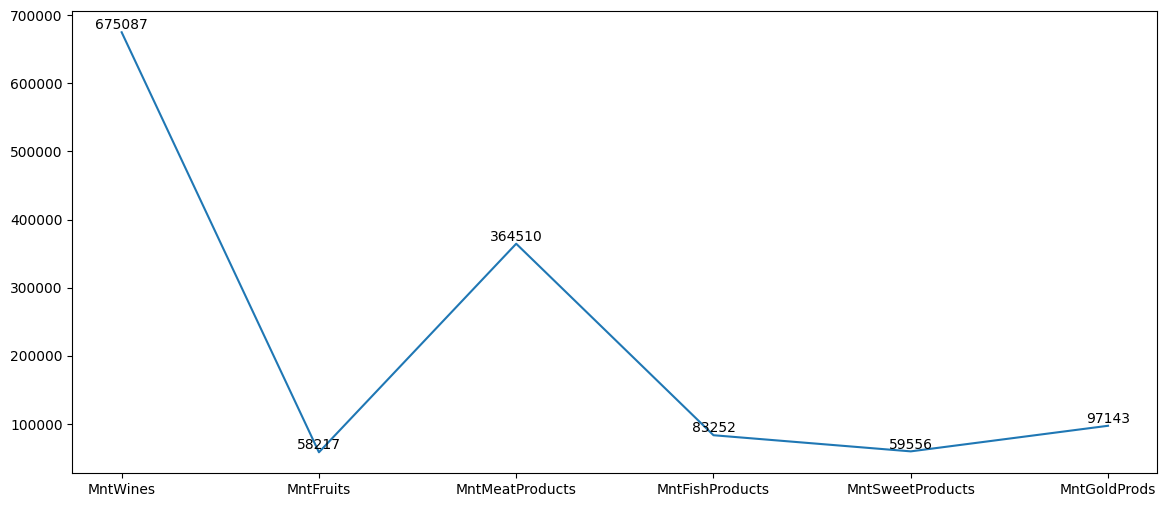

In [58]:
commodities = data_set.loc[:, ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
total_value = commodities.sum(axis=0)
plt.figure(figsize=(14,6))
plt.plot(total_value.index, total_value.values)
for i, value in enumerate(total_value.values):
    plt.text(total_value.index[i], value, str(value), ha='center', va='bottom')
plt.show()


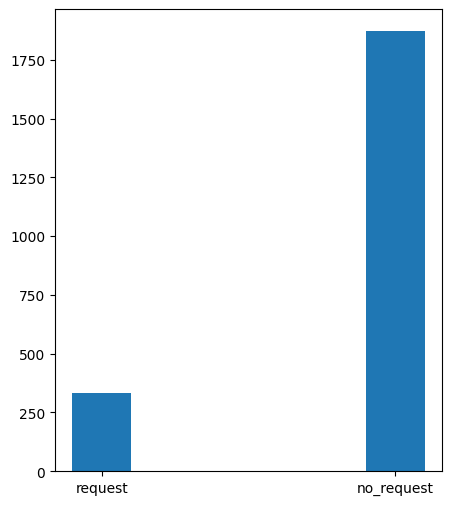

In [59]:
data_set = pd.read_csv("./customer.csv")
Response = data_set["Response"]

request = sum(Response)
no_request = len(Response) - request
array = [request, no_request]
array_name = ['request', 'no_request']

plt.figure(figsize=(5,6))
plt.bar(array_name, array,width=0.2)
plt.show()



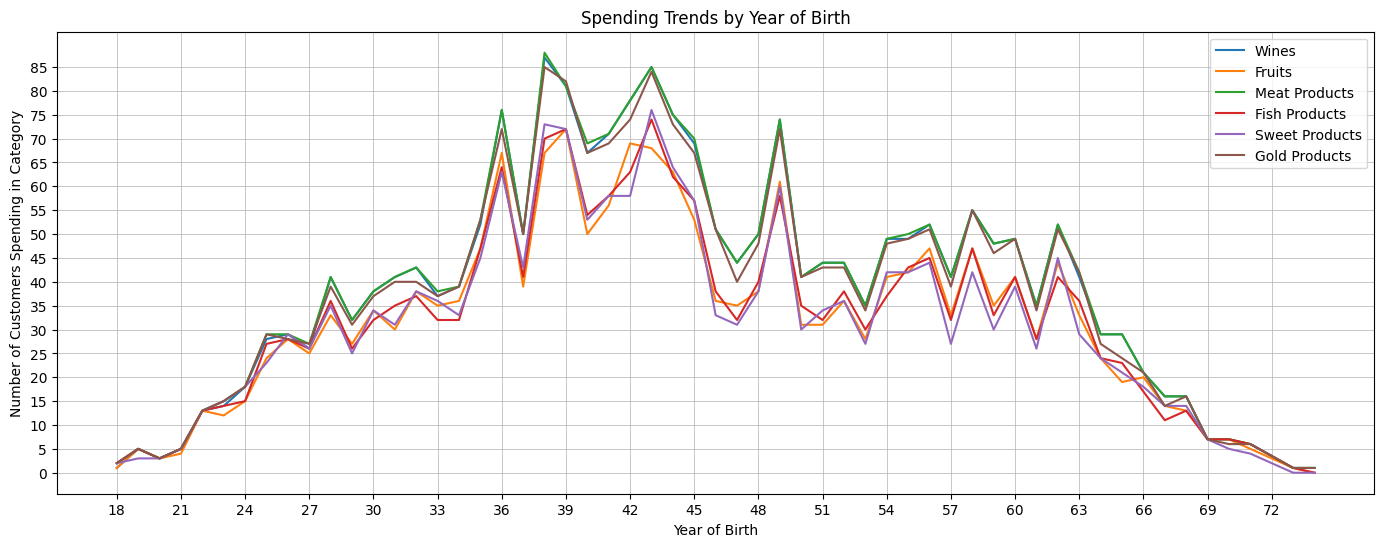

In [60]:
sbd = data_set.loc[:, ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Year_Birth']]
for item in sbd:
    if item != 'Year_Birth':
        sbd[item] = np.where(sbd[item] > 0, 1,sbd[item] )

grouped_sbd = sbd.groupby('Year_Birth').sum()

plt.figure(figsize=(17, 6))  
plt.plot(grouped_sbd.index, grouped_sbd['MntWines'], label='Wines')
plt.plot(grouped_sbd.index, grouped_sbd['MntFruits'], label='Fruits')
plt.plot(grouped_sbd.index, grouped_sbd['MntMeatProducts'], label='Meat Products')
plt.plot(grouped_sbd.index, grouped_sbd['MntFishProducts'], label='Fish Products')
plt.plot(grouped_sbd.index, grouped_sbd['MntSweetProducts'], label='Sweet Products')
plt.plot(grouped_sbd.index, grouped_sbd['MntGoldProds'], label='Gold Products')

plt.xlabel('Year of Birth')
plt.ylabel('Number of Customers Spending in Category')
plt.title('Spending Trends by Year of Birth')
plt.legend()
plt.grid(which='both', linestyle='-', linewidth=0.5)
plt.xticks(np.arange(grouped_sbd.index.min(), grouped_sbd.index.max()+1, 3)) 
plt.yticks(np.arange(0, grouped_sbd.max().max()+1, 5))
plt.show()






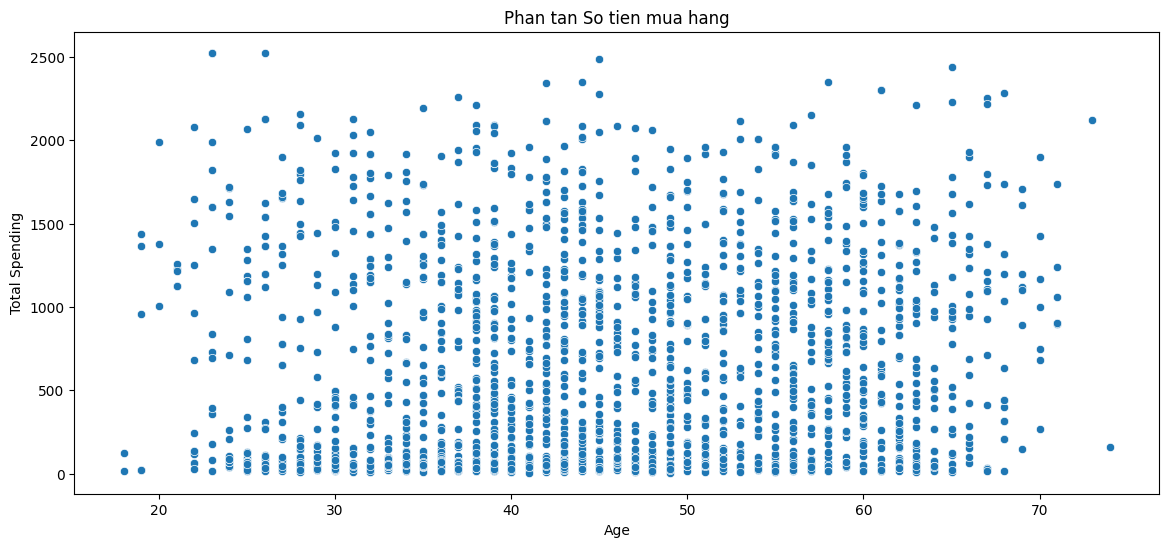

In [61]:
sbd = data_set.loc[:, ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Year_Birth']]
sbd['Total_Spending'] = sbd.drop('Year_Birth', axis=1).sum(axis=1)
plt.figure(figsize=(14, 6))
sns.scatterplot(x='Year_Birth', y='Total_Spending', data=sbd)
plt.title("Phan tan So tien mua hang")
plt.xlabel("Age")
plt.ylabel("Total Spending")
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_11436\530278129.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=Year_Birth, y=Income, label="Income", ci=None)
C:\Users\DELL\AppData\Local\Temp\ipykernel_11436\530278129.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=Year_Birth, y=Total_spending, label="Total_spending", ci=None)


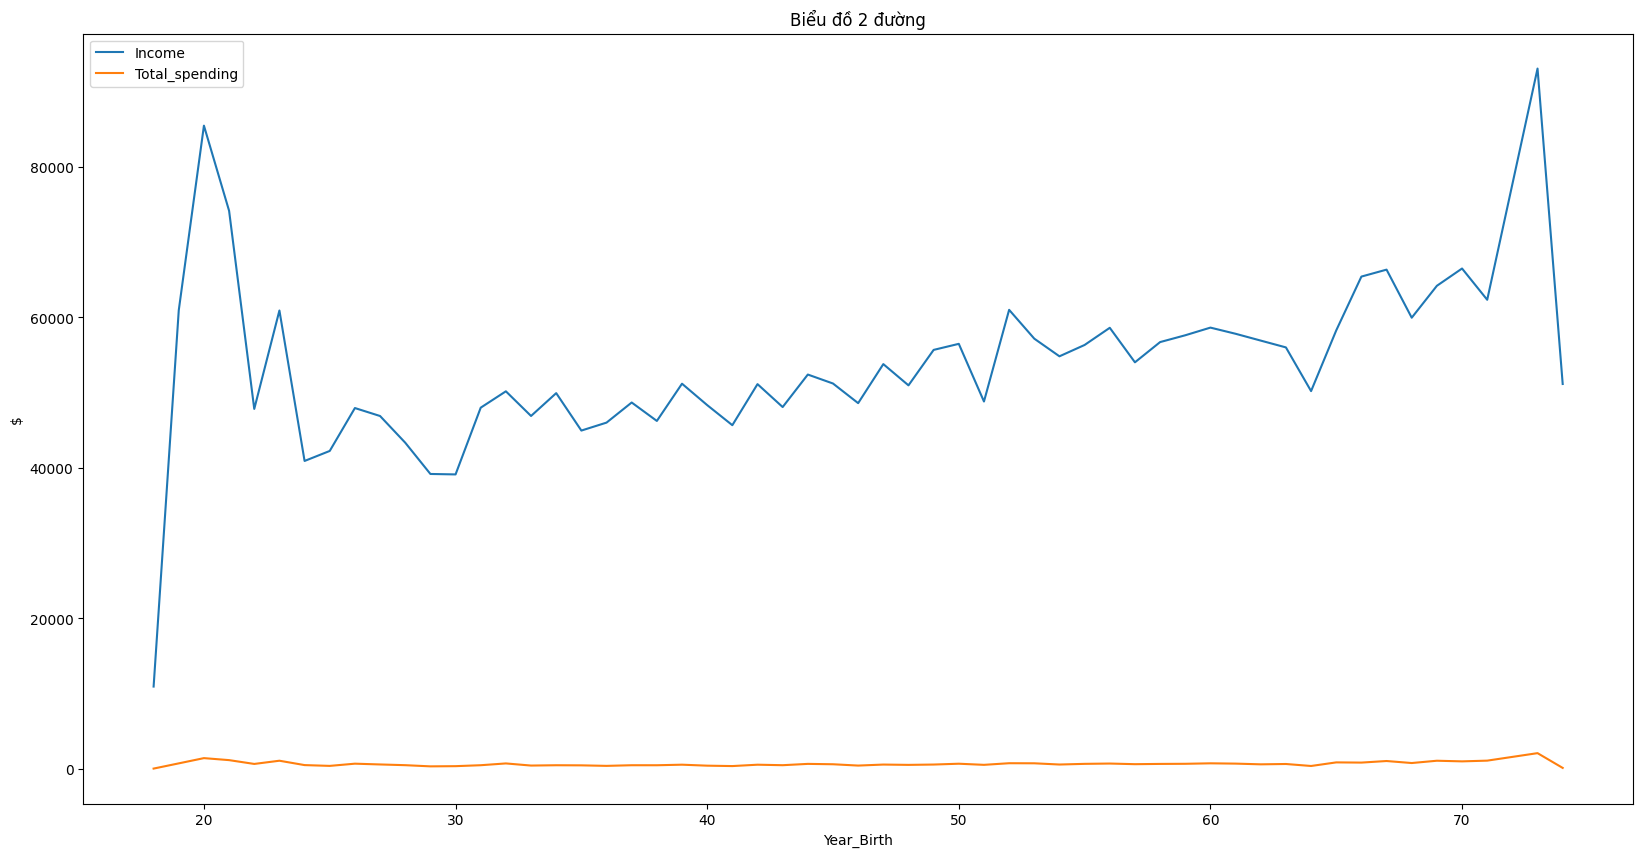

In [62]:
pay = data_set.loc[:, ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'] ]
Income = data_set['Income']
Year_Birth = data_set['Year_Birth']
Total_spending =  pay.sum(axis=1)
plt.figure(figsize=(20, 10))
sns.lineplot(x=Year_Birth, y=Income, label="Income", ci=None)
sns.lineplot(x=Year_Birth, y=Total_spending, label="Total_spending", ci=None)
plt.title('Biểu đồ 2 đường')
plt.xlabel('Year_Birth')
plt.ylabel('$')
plt.legend()
plt.show()


In [63]:
data_set['Spent'] = data_set['MntWines'] + data_set['MntFruits'] + data_set['MntMeatProducts'] + data_set['MntFishProducts'] + data_set['MntSweetProducts'] + data_set['MntGoldProds']
def Exotic_float_2w(file_path, data_set, label_name_1, label_name_2, value1, value2):
    value_where1 = np.float32(value1)
    value_where2 = np.int16(value2)
    data_set = data_set.query(f"{label_name_1} > {value_where1} and {label_name_2} < {value_where2}")
    data_set.to_csv(file_path, index=False)

Exotic_float_2w("./customer.csv", data_set, "Income", "Spent", 12000, 2000 )
 

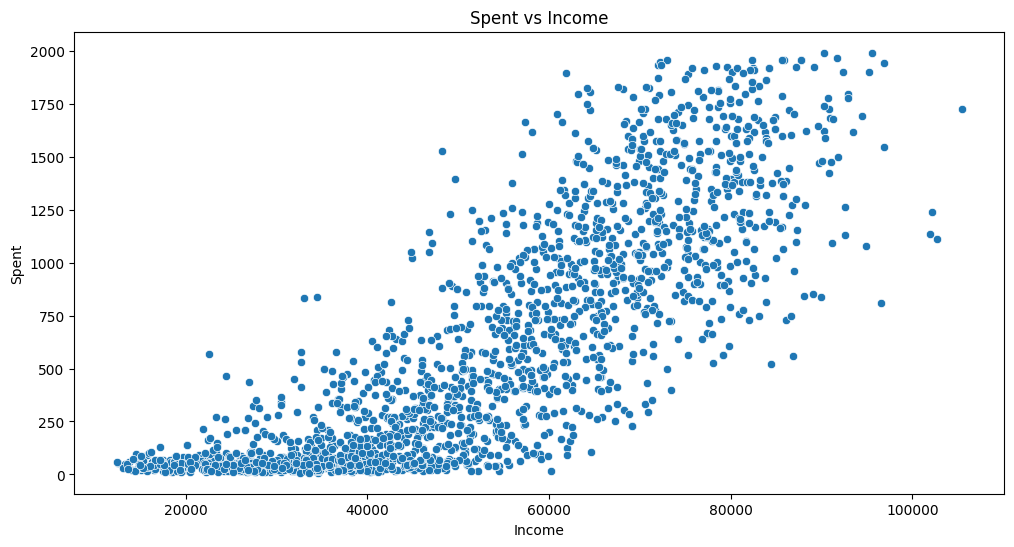

In [64]:
data_set = pd.read_csv('./customer.csv')
plt.figure(figsize = (12, 6))
sns.scatterplot(data_set, x = 'Income', y = 'Spent')
plt.title("Spent vs Income")
plt.grid(False)
plt.show()

In [65]:
data_set = pd.read_csv('./customer.csv')
data_set['Spent'] = data_set['MntWines'] + data_set['MntFruits'] + data_set['MntMeatProducts'] + data_set['MntFishProducts'] + data_set['MntSweetProducts'] + data_set['MntGoldProds']
data_set['functional_foods'] = data_set['MntSweetProducts'] + data_set['MntGoldProds'] + data_set['MntWines']
data_set['food'] = data_set['MntFruits'] + data_set['MntMeatProducts'] + data_set['MntFishProducts']
data_set.to_csv('./customer.csv', index=False)


In [66]:

data_set = pd.read_csv("customer.csv")

X = data_set[["Income", "Year_Birth"]]
y = data_set["Spent"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=70, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")

R-squared: 0.7423560744924269
Mean Squared Error: 80214.62954241005
